K Means Clustering

### Data Description  <a id='dd'>
    
The dataset consists of 3 different varieties of wheat kernels: Kama, Rosa and Canadian. <br>
Different physical attributes of the wheat kernels were measured and recorded.
Here we have 70 records for each variety.

Using these records we will perform cluster analysis to determine the variety.

Attribute Information:<br>

To construct the data, seven geometric parameters of wheat kernels were measured: <br>
1. area A,
2. perimeter P,
3. compactness C = 4*pi*A/P^2,
4. length of kernel,
5. width of kernel,
6. asymmetry coefficient
7. length of kernel groove.
All of these parameters were real-valued continuous.

### Importing the dataset and packages  <a id = 'import'>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns
import pandas_profiling
from pandas_profiling import ProfileReport

In [4]:
url = 'C:/Users/Nikhil Jain/Desktop/Code/K Mean/UPX/seeds_dataset.csv'

In [5]:
seeds_df = pd.read_csv(url)
seeds_df.head(5)

,area,perimeter,compactness,length,width,asymmetry coef,kernel_groove_length,species
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [5]:
seeds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   area                  210 non-null    float64
 1   perimeter             210 non-null    float64
 2   compactness           210 non-null    float64
 3   length                210 non-null    float64
 4   width                 210 non-null    float64
 5   asymmetry coef        210 non-null    float64
 6   kernel_groove_length  210 non-null    float64
 7   species               210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


In [6]:
seeds_df.describe()

,area,perimeter,compactness,length,width,asymmetry coef,kernel_groove_length,species
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


In [10]:
#Pandas Profiling

report = pandas_profiling.ProfileReport(seeds_df)
report.to_file('seeds.html')

The output variable is Species and we need to drop that. The idea here is to find 3 cluster. So lets see how K Mean Clustering fares.If we already know the output variable, we generally don't do clustering. But here we are trying to showcase the power of K Means. We are not supposed to know that there are 3 species since this is unsupervised learning algorithm.  

1- There are no missing values.

2- There is not much variance. So there will be no need for scaling.

### Exploratory Data Analysis  <a id = 'eda'>

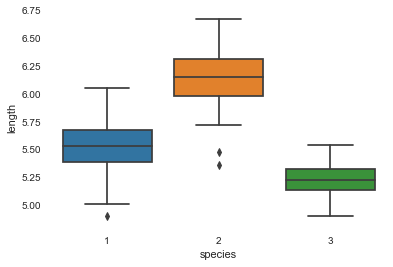

In [11]:
sns.boxplot(x='species', y= 'length', data = seeds_df)

Length is a good candidate which identifies the species distinctly. It cuts the 3 species with a horizontal line if we take a closer look.

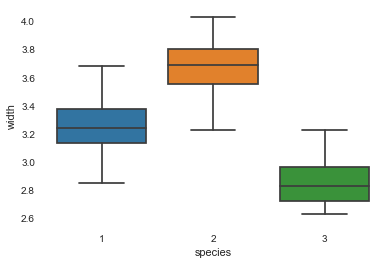

In [12]:
sns.boxplot(x='species', y='width', data = seeds_df)

Width is also a good candidate and separates out species distinctly.

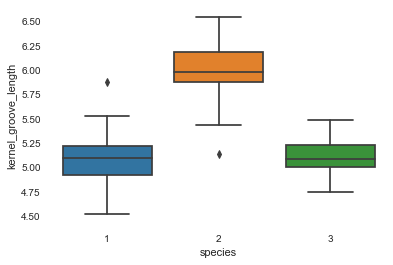

In [13]:
sns.boxplot(x='species', y='kernel_groove_length', data = seeds_df)

Compared to length and width, we cannot segregate the 3 species since two of the species has almost the same kernel_groove_length.

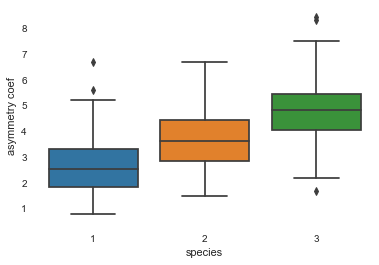

In [14]:
sns.boxplot(x='species', y='asymmetry coef', data = seeds_df)

This is slightly better than kernel_groove_length but not better than length and width.

### Correlation Plot

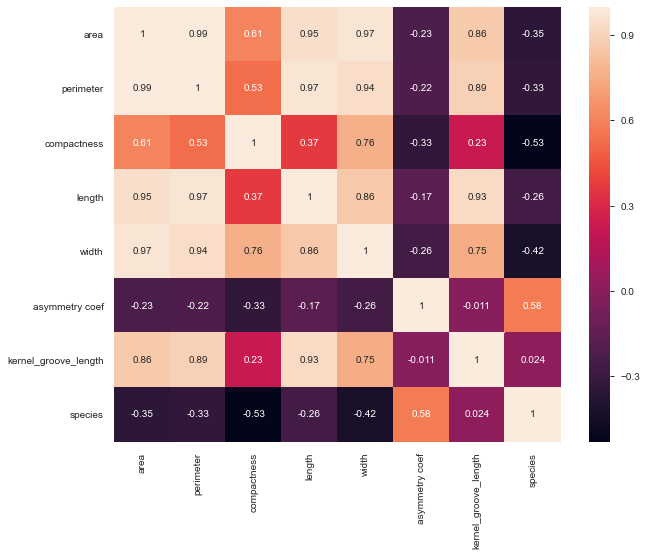

In [15]:
figsize = [10,8]
plt.figure(figsize=figsize)
sns.heatmap(seeds_df.corr(), annot = True)
plt.show()

**Strong Correlation between**: area, perimeter, length, width, kernel_groove_length

### Histogram

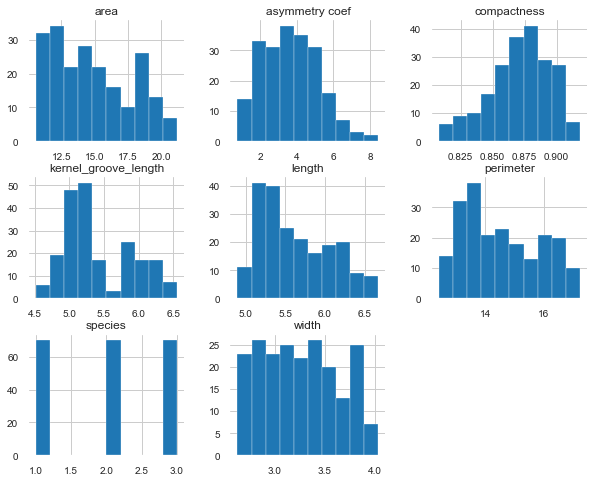

In [16]:
seeds_df.hist(figsize=figsize)
plt.show()

We will drop compactness and species. <br>
Compactness is a column derived from perimeter and area which will not be required.  <br>
We are going to determine species.

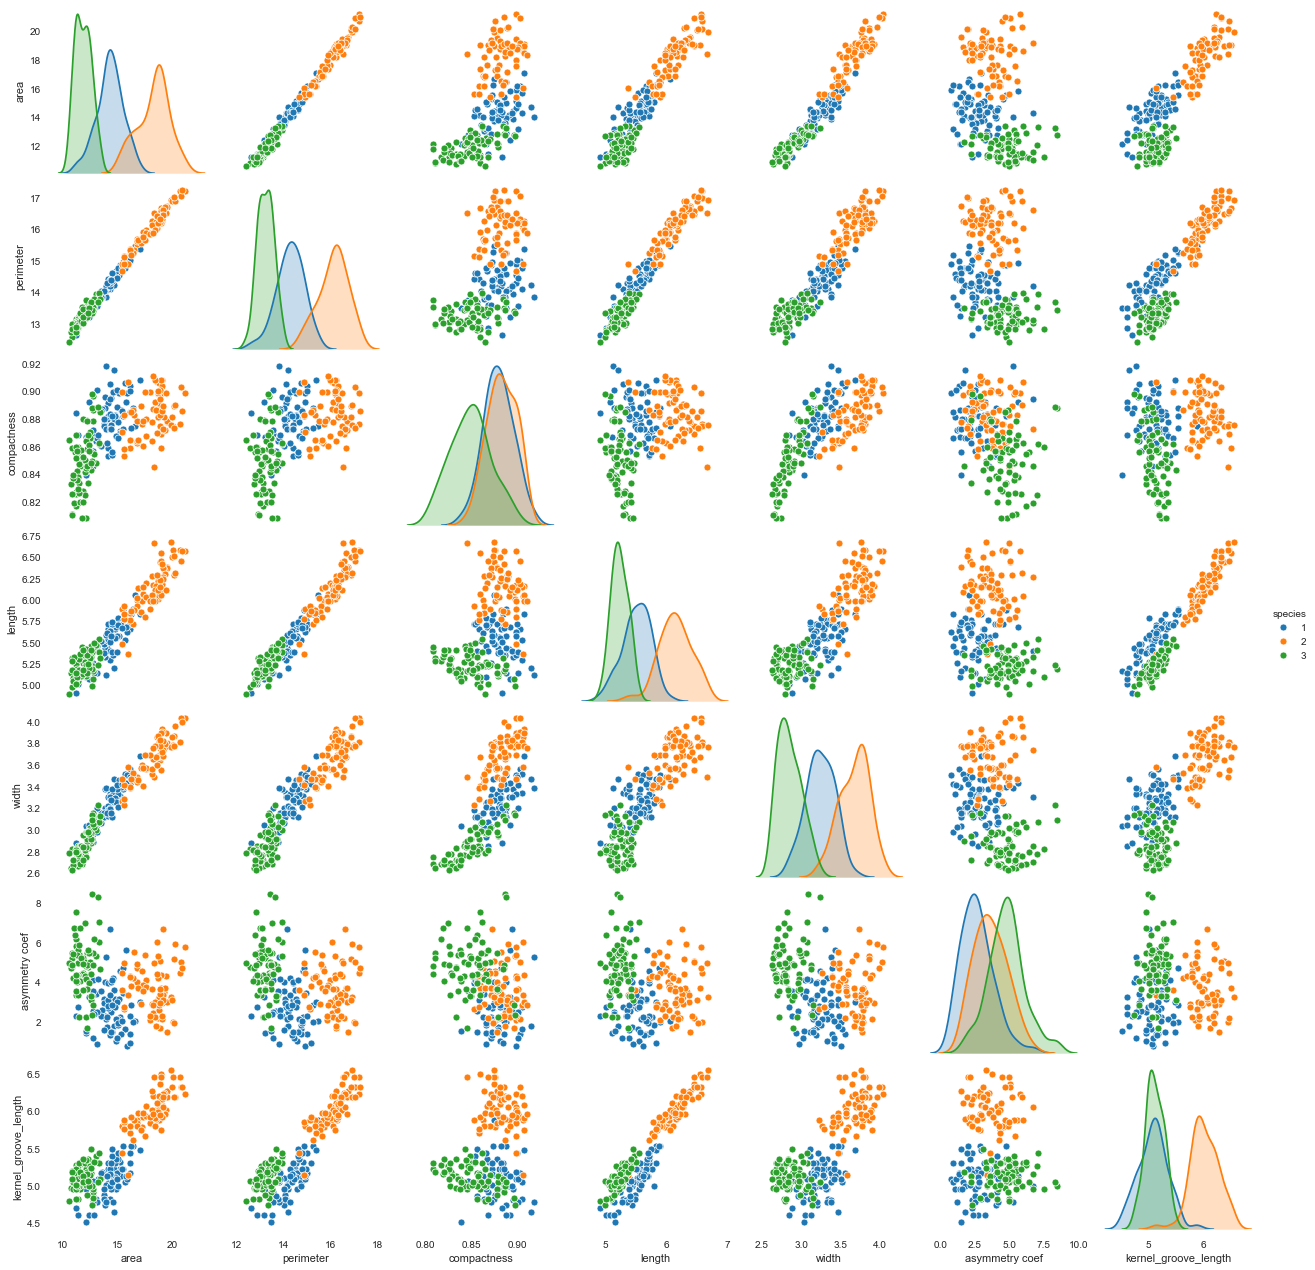

In [6]:
sns.pairplot(seeds_df, hue='species')

In [7]:
data = seeds_df.drop(['compactness', 'species'], axis =1)

In [8]:
data.head()

,area,perimeter,length,width,asymmetry coef,kernel_groove_length
0,15.26,14.84,5.763,3.312,2.221,5.220
1,14.88,14.57,5.554,3.333,1.018,4.956
2,14.29,14.09,5.291,3.337,2.699,4.825
3,13.84,13.94,5.324,3.379,2.259,4.805
4,16.14,14.99,5.658,3.562,1.355,5.175


### Finding clusters with Elbow Method   <a id='elbow'>

We don't know what value of K I should go for so I am building 10 K Means models. For that I have written a function. 

In [9]:
from sklearn.cluster import KMeans

ssw = []
cluster_range = range(1,10)
for i in cluster_range:
    model = KMeans(n_clusters = i, init = "k-means++", n_init = 10, max_iter = 300, random_state = 0)
    model.fit(data)
    ssw.append(model.inertia_)

In [10]:
ssw_df = pd.DataFrame({"No Of Clusters": cluster_range, "SSW" : ssw})
print(ssw_df)

   No Of Clusters          SSW
0               1  2719.735715
1               2  1011.620084
2               3   587.246038
3               4   470.931572
4               5   385.435041
5               6   323.797770
6               7   279.452106
7               8   240.511652
8               9   217.614254


### Plotting the above as an elbow plot.

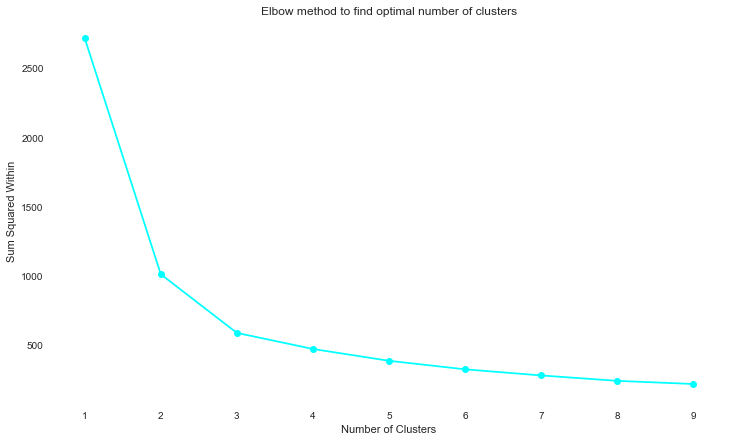

In [11]:
plt.figure(figsize=(12,7))
plt.plot(cluster_range, ssw, marker = 'o', color = 'cyan')
plt.xlabel("Number of Clusters")
plt.ylabel("Sum Squared Within")
plt.title("Elbow method to find optimal number of clusters")
plt.show()

**Please notice that we spotted the elbow when number of clusters is 3 and after 3rd cluster there is no significant change in ssw.**

### Building the KMeans Model

In [12]:
# We'll continue our analysis with n_clusters = 3

kmeans = KMeans(n_clusters = 3, init = "k-means++", n_init = 10, random_state = 42)

#Fit the Model

k_model = kmeans.fit(data)

In [13]:
## It returns the cluster vectors i.e. showing observations belonging which clusters 
clusters=k_model.labels_
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2])

**This is similar to the 3 species that we originally had.**  <br>
Cluster 1 -- Species 1  <br>
Cluster 0 -- Species 2  <br>
Cluster 2 --  Species 3

In [14]:
seeds_df['clusters'] = clusters

In [15]:
seeds_df.head()

,area,perimeter,compactness,length,width,asymmetry coef,kernel_groove_length,species,clusters
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1,1


In [16]:
seeds_df['clusters'].value_counts()

2    77
1    72
0    61
Name: clusters, dtype: int64

In [18]:
#Centroid of each clusters

centroid_df = pd.DataFrame(k_model.cluster_centers_, columns = data.columns)
centroid_df

,area,perimeter,length,width,asymmetry coef,kernel_groove_length
0,18.721803,16.297377,6.208934,3.722672,3.603590,6.066098
1,14.648472,14.460417,5.563778,3.277903,2.648933,5.192319
2,11.964416,13.274805,5.229286,2.872922,4.759740,5.088519


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


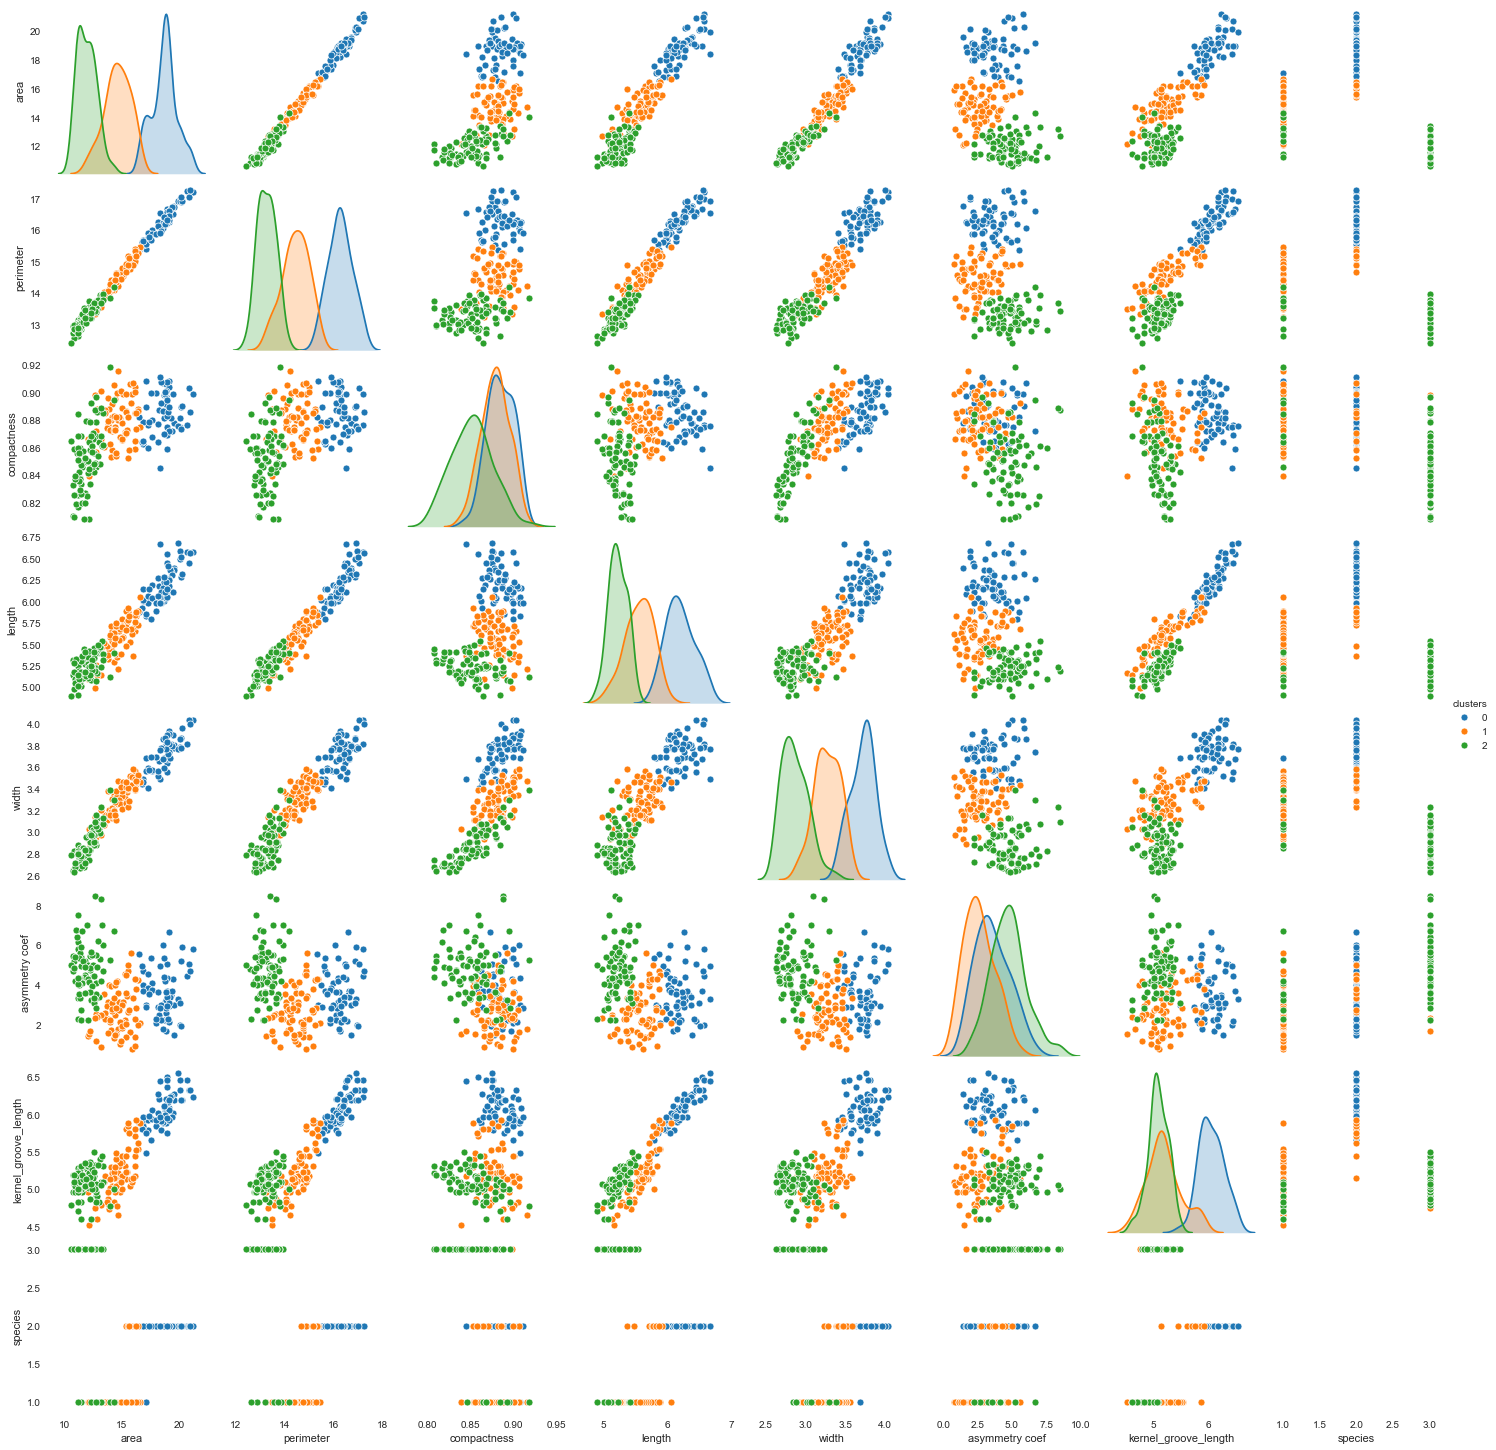

In [20]:
### Visualizing the cluster based on each pair of columns

sns.pairplot(seeds_df, hue='clusters')

### THE END